In [159]:
%pylab inline
%config InlineBackend.figure_format='retina'

Populating the interactive namespace from numpy and matplotlib


## Load and inspect simulation data

In [2]:
import pandas
import seaborn
from scipy.stats import skew, entropy, kurtosis, gaussian_kde, pearsonr
from os import listdir
from SuchTree import SuchTree, SuchLinkedTrees
from pyprind import ProgBar

reading data, building graphs...
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:31


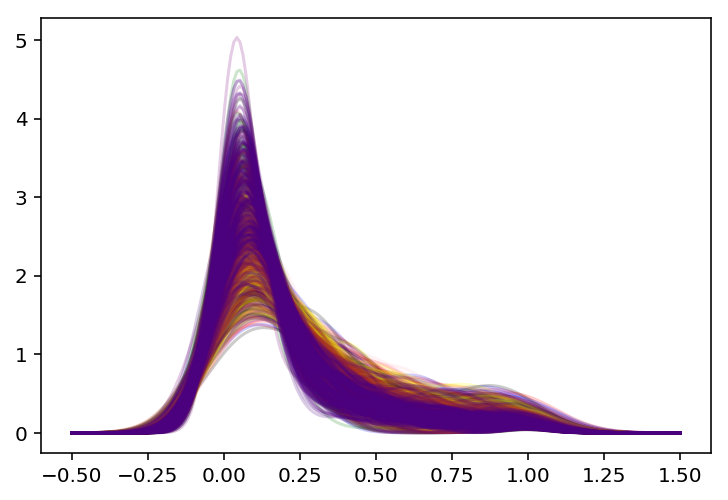

In [43]:
X = linspace( -0.5, 1.5, 200 )

path_noswitch_slow     = { 'path'  : 'simulations/noswitch_slow/',
                           'label' : 'noswitch_slow',
                           'switch': 'none',
                           'g_evol': 'slow',
                           'color' : 'red' }
path_noswitch_balanced = { 'path'  : 'simulations/noswitch_balanced/',
                           'label' : 'noswitch_balanced',
                           'switch': 'none',
                           'g_evol': 'balanced',
                           'color' : 'blue' }
path_noswitch_fast     = { 'path'  : 'simulations/noswitch_fast/',
                           'label' : 'noswitch_fast',
                           'switch': 'none',
                           'g_evol': 'fast',
                           'color' : 'green' }

path_slowswitch_slow     = { 'path'  : 'simulations/slowswitch_slow/',
                             'label' : 'slowswitch_slow',
                             'switch': 'slow',
                             'g_evol': 'slow',
                             'color' : 'pink' }
path_slowswitch_balanced = { 'path'  : 'simulations/slowswitch_balanced/',
                             'label' : 'slowswitch_balanced',
                             'switch': 'slow',
                             'g_evol': 'balanced',
                             'color' : 'black' }
path_slowswitch_fast     = { 'path'  : 'simulations/slowswitch_fast/',
                             'label' : 'slowswitch_fast',
                             'switch': 'slow',
                             'g_evol': 'fast',
                             'color' : 'purple' }

path_fastswitch_slow     = { 'path'  : 'simulations/fastswitch_slow/',
                             'label' : 'fastswitch_slow',
                             'switch': 'fast',
                             'g_evol': 'slow',
                             'color' : 'yellow' }
path_fastswitch_balanced = { 'path'  : 'simulations/fastswitch_balanced/',
                             'label' : 'fastswitch_balanced',
                             'switch': 'fast',
                             'g_evol': 'balanced',
                             'color' : 'brown' }
path_fastswitch_fast     = { 'path'  : 'simulations/fastswitch_fast/',
                             'label' : 'fastswitch_fast',
                             'switch': 'fast',
                             'g_evol': 'fast',
                             'color' : 'indigo' }

allsims = [ path_noswitch_slow,   path_noswitch_balanced,   path_noswitch_fast,
            path_slowswitch_slow, path_slowswitch_balanced, path_slowswitch_fast,
            path_fastswitch_slow, path_fastswitch_balanced, path_fastswitch_fast]

moments = []
data = []
spectra = []
SLTs = []
igraphs = []

p = ProgBar( sum( [ len(i) for i in [ listdir(sim['path']) for sim in allsims ] ] ),
             title='reading data, building graphs...' )

for sim in allsims :
    for run in listdir( sim['path'] ) :
        if run.endswith( '.log' ) : p.update(); continue
        
        sim['run'] = run
        path = sim['path'] + run + '/'
        
        # read the calculated eigenvalues, build density distribution
        eg = array( map( float, open( path + 'eigenvalues.csv').readline().split()[1].split(',') ) )
        density = gaussian_kde( eg/max(eg), bw_method=0.4 ).pdf( X )
        
        # read the calculated moments, build a DataFrame row
        moments.append( pandas.read_csv( path + 'moments.csv' ) )
        d = pandas.read_csv( path + 'data.csv' )
        d = pandas.DataFrame([sim]).join(d)
        data.append( d )
        
        # plot the spectral densities
        spectra.append( density )
        plot( X, density, color=sim['color'], alpha=0.2 )
        
        # build the graph objects
        T1 = SuchTree( path + 'host.relaxed.tree' )
        T2 = SuchTree( path + 'guest.relaxed.tree' )
        LK = pandas.read_csv( path + 'links.csv', index_col=0 )
        SLT = SuchLinkedTrees( T1, T2, LK )
        SLTs.append( SLT )
        igraphs.append( SLT.to_igraph() )
        
        p.update()
    
moments = pandas.concat( moments, ignore_index=True )
data = pandas.concat( data, ignore_index=True )

In [44]:
q = moments.join(data)
q.head()

,eigengap,skew,occupancy,treedist,p,r,squareness,kurtosis,color,g_evol,...,duplication_rate,prefix,guest_leafs,theta,k,loss_rate,min_guest_leafs,host_leafs,max_guest_leafs,max_host_leafs
0,0.179776,1.123630,1.000000,0.180138,0.197220,0.251218,1.000000,-0.046144,red,slow,...,0.0125,noswitch_slow/run39,8,0.5,2.0,0.0025,4,8,128,128
1,0.341961,0.794785,0.933333,0.150083,0.003365,0.609343,1.142857,-0.737914,red,slow,...,0.0125,noswitch_slow/run50,7,0.5,2.0,0.0025,4,8,128,128
2,0.610641,0.932618,0.769231,0.203625,0.474093,0.256665,1.600000,-0.416426,red,slow,...,0.0125,noswitch_slow/run149,5,0.5,2.0,0.0025,4,8,128,128
3,0.463081,1.111926,1.000000,0.247618,0.000180,0.650255,1.000000,-0.211371,red,slow,...,0.0125,noswitch_slow/run163,8,0.5,2.0,0.0025,4,8,128,128
4,0.101506,1.325231,1.000000,0.243475,0.022413,0.429901,1.000000,0.344731,red,slow,...,0.0125,noswitch_slow/run172,8,0.5,2.0,0.0025,4,8,128,128


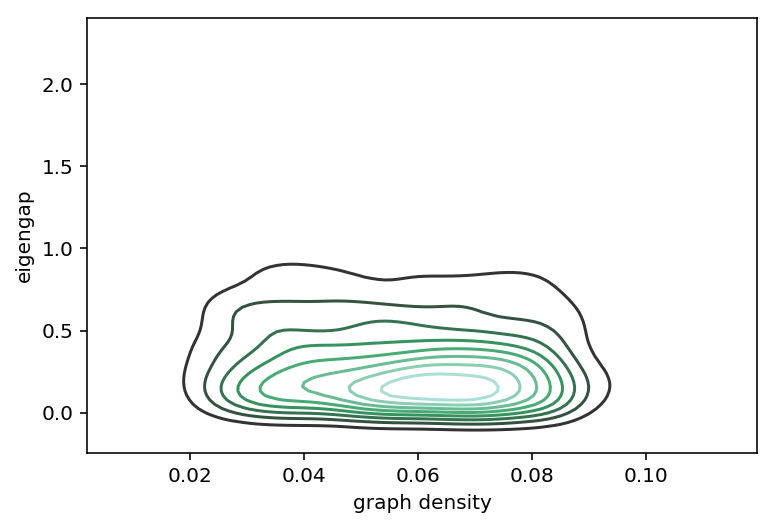

In [63]:
#scatter( q.occupancy, q.treedist )

seaborn.kdeplot( [ ig.density() for ig in igraphs ], q.eigengap )
xlabel( 'graph density' )

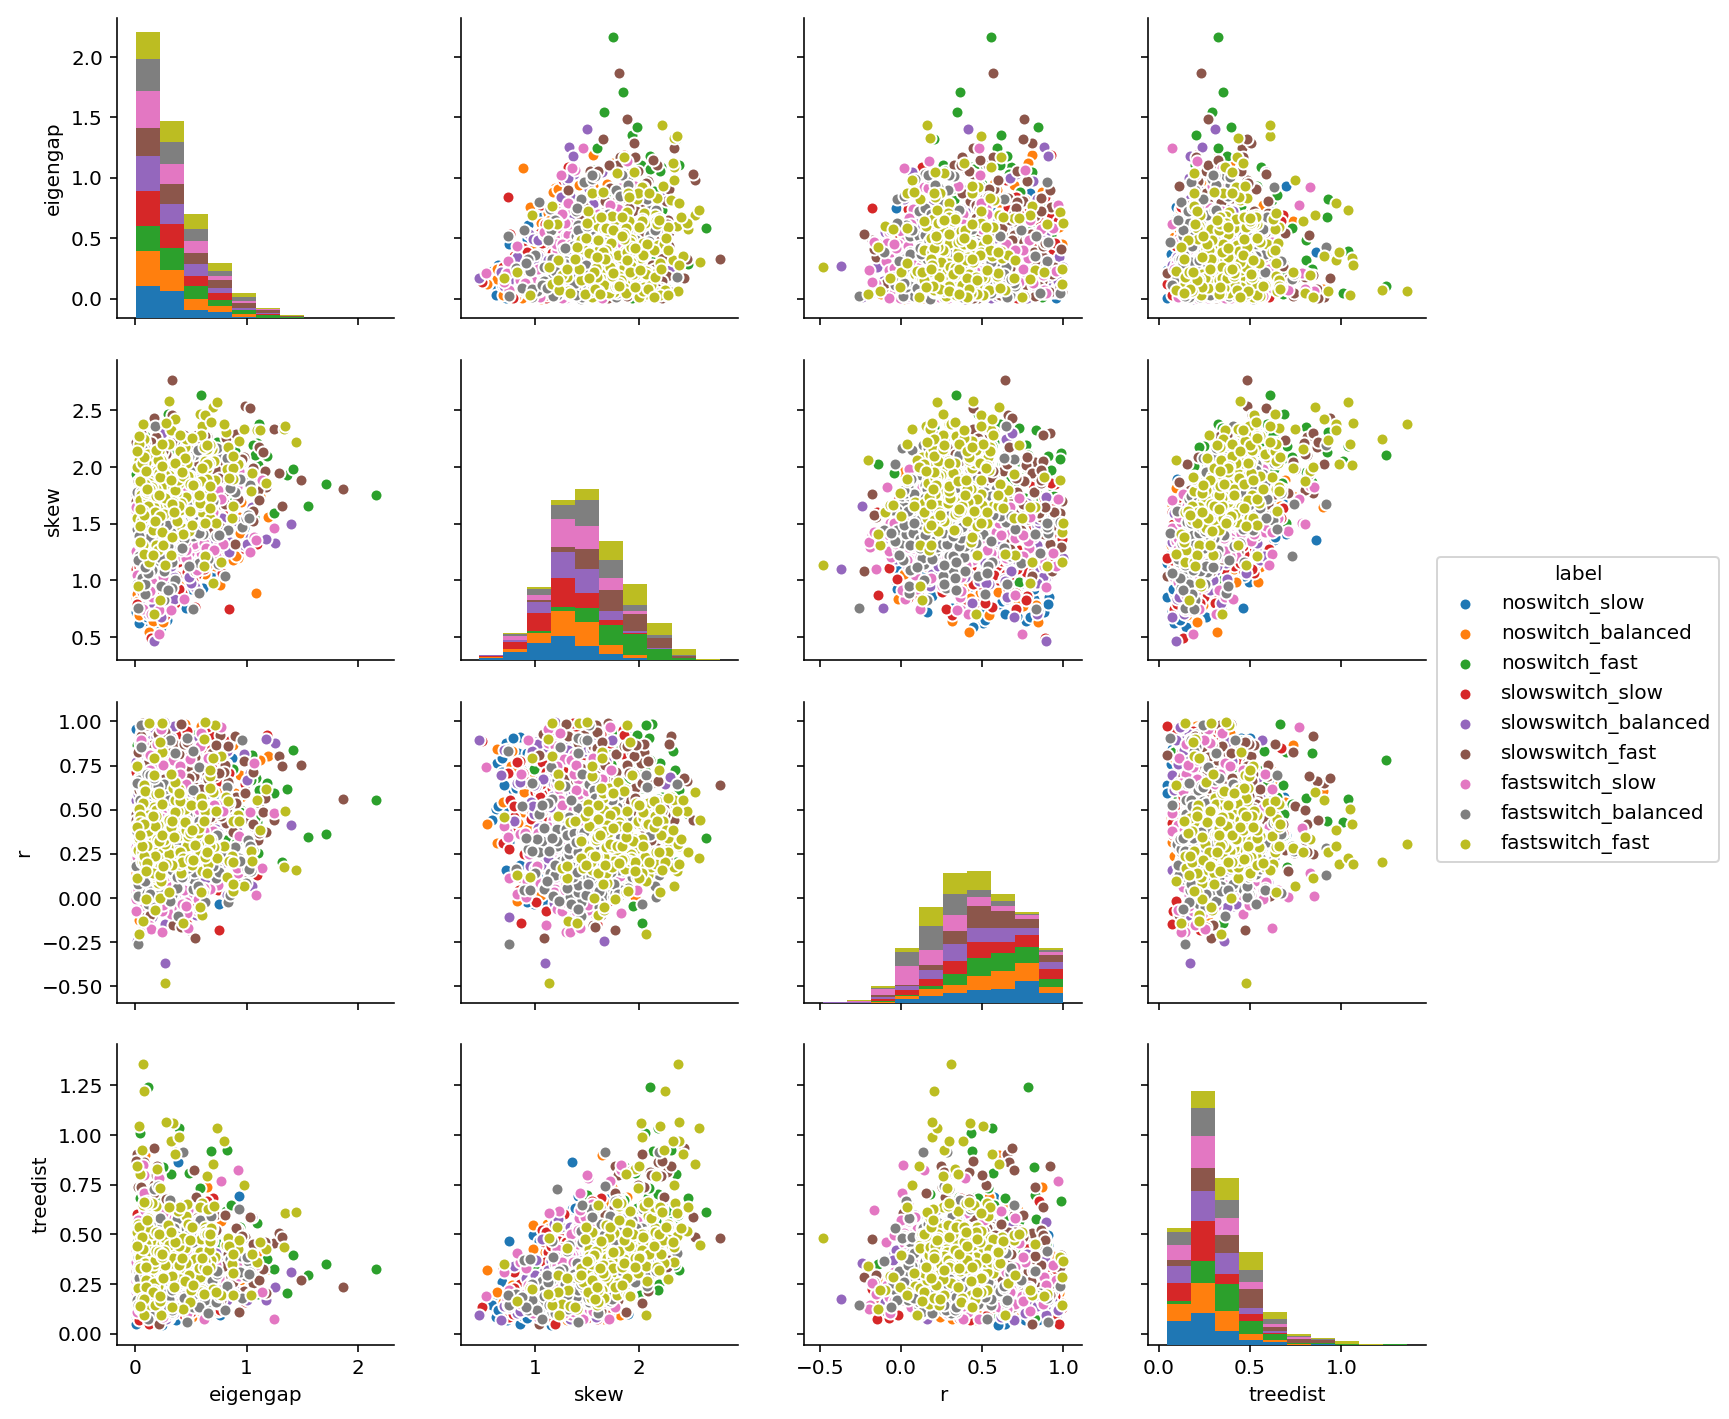

In [64]:
seaborn.pairplot( q.dropna(), vars=['eigengap', 'skew', 'r', 'treedist',], hue='label' )

We expepect that as the spectral distance between the tree components of a graph increases
(indicating more dissimilar tree topology), the Hommola correlation of the interaction graph
should decrease. They are indeed inversely correlated, though not strongly so (r=-0.08, p=0.0008).

(-0.07869711207801403, 0.0008382657292578823)


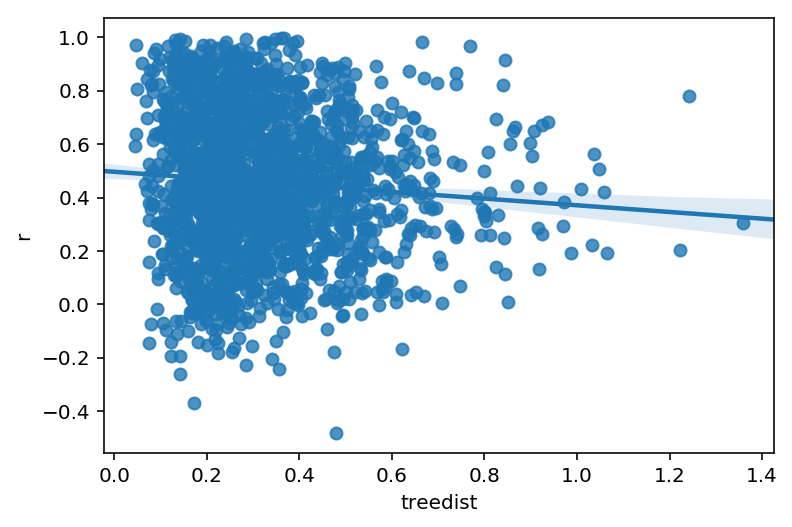

In [29]:
seaborn.regplot( x='treedist', y='r', data=q.dropna() )
print pearsonr( q.dropna().treedist, q.dropna().r ) 

## Clustering with graph moments

In [ ]:
# This code is adapted from BiWeb
# https://github.com/tpoisot/bipy/blob/master/bipy/nes/nodf.py

def adjacency(W):
    # from BiWeb 
    adj = numpy.copy(W)
    adj[adj>0] = 1
    return adj

def generality(W):
    # from BiWeb
    ad = adjacency(W)
    gen = numpy.sum(ad,axis=1)
    return gen

def vulnerability(W):
    # from BiWeb
    ad = adjacency(W)
    vul = numpy.sum(ad,axis=0)
    return vul

def v_rank(V):
    # from BiWeb
    # Returns the rank of a vector
    # with no ties
    rn = numpy.zeros(len(V),dtype=numpy.int32)
    crnk = 0
    while crnk < len(V):
        for j in xrange(0,len(V)):
            cMax = numpy.max(V)
            if V[j] == cMax:
                rn[j] = crnk
                crnk += 1
                V[j] = numpy.min(V)-1
                break
    return rn

def sortbydegree(W):
    # from BiWeb
    # Sort a matrix by degree
 
    g = generality(W)
    v = vulnerability(W)
    upsp = len(W)
    losp = len(W[0])
    web = W
    ## Step 1 : sort TLO
    rG = v_rank( g )
    nW = numpy.zeros((upsp,losp))
    for ro in range(0,upsp):
        nW[rG[ro]] = web[ro]
    ## Step 2 : sort BLO
    nW = nW.T
    dW = numpy.zeros((upsp,losp)).T
    rG = v_rank(v)
    for ro in range(0,losp):
        dW[rG[ro]] = nW[ro]
    Fweb = numpy.copy(dW.T)

    return Fweb

def nestadj(aW):
    # from BiWeb
    return adjacency(sortbydegree(aW))

def compareones(w1,w2,tn):
    # from BiWeb
    if tn == 0 : return 0.0
    return numpy.sum( (w1+w2) == 2 )/tn

def getNpaired(W):
    # Required for NODF calculation
    # Get the N paired value of a web
    Npaired = []
    gen = generality(W)
    for i in xrange(0,(len(W)-1)):
        for j in xrange((i+1),len(W)):
            if gen[i] >= gen[j]:
                Npaired.append(compareones(W[i],W[j],gen[j]))
            else :
                Npaired.append(0.0)
    return Npaired

def nodf(aW):
    # from BiWeb
    """
    The strict boolean tells if the condition for overlap needs to be
    strictly enforced or not. If srict = False, this can somehow increase the NODF
    values.
    """
    if (len(aW[0])==1)|(len(aW)==1):
        return [0,0,0]
    W = nestadj(aW)
    NProw = getNpaired(W)
    NPcol = getNpaired(W.T)
    # Output the NODF value
    ColCor = (len(W[0])*(len(W[0])-1))/2.0
    RowCor = (len(W)*(len(W)-1))/2.0
    NrowSum = numpy.sum( NProw )
    NcolSum = numpy.sum( NPcol )
    WholeNest = (NcolSum+NrowSum)/(ColCor + RowCor)
    ColNest = NcolSum/ColCor
    RowNest = NrowSum/RowCor
    return WholeNest, ColNest, RowNest

In [311]:
gm = q[[ 'eigengap', 'skew', 'occupancy', 'treedist', 'r', 'p', 'squareness', 'kurtosis' ]]

gm = gm.join( pandas.DataFrame( [ ig.diameter() for ig in igraphs ], columns=['diameter'] ) )
gm = gm.join( pandas.DataFrame( [ mean(ig.eccentricity()) for ig in igraphs ], columns=['eccentricity'] ) )
gm = gm.join( pandas.DataFrame( [ mean(ig.betweenness()) for ig in igraphs ], columns=['mean_betweenness'] ) )
gm = gm.join( pandas.DataFrame( [ std(ig.betweenness()) for ig in igraphs ], columns=['std_betweenness'] ) )
gm = gm.join( pandas.DataFrame( [ ig.modularity( ig.vs['tree'] ) for ig in igraphs], columns=['modularity'] ) )
#gm = gm.join( pandas.DataFrame( [ nodf( SLT.linkmatrix ) for SLT in SLTs ], columns=['WholeNest', 'ColNest', 'RowNest'] ) )
gm = gm.join( pandas.DataFrame( [ nodf( SLT.linkmatrix )[0] for SLT in SLTs ], columns=['nestedness'] ) )

gm.head()

,eigengap,skew,occupancy,treedist,r,p,squareness,kurtosis,diameter,eccentricity,mean_betweenness,std_betweenness,modularity,nestedness
0,0.179776,1.123630,1.000000,0.180138,0.251218,0.197220,1.000000,-0.046144,7,6.733333,44.333333,35.102245,0.277778,0.000000
1,0.341961,0.794785,0.933333,0.150083,0.609343,0.003365,1.142857,-0.737914,8,6.857143,41.821429,31.650575,0.286042,0.000000
2,0.610641,0.932618,0.769231,0.203625,0.256665,0.474093,1.600000,-0.416426,10,7.750000,37.791667,35.790902,0.290123,0.026316
3,0.463081,1.111926,1.000000,0.247618,0.650255,0.000180,1.000000,-0.211371,8,7.400000,47.466667,37.439463,0.277778,0.000000
4,0.101506,1.325231,1.000000,0.243475,0.429901,0.022413,1.000000,0.344731,8,7.400000,47.066667,37.251889,0.277778,0.000000


In [327]:
#gm_embedded = pandas.DataFrame( TSNE(n_components=2, perplexity=100).fit_transform( gm.dropna() ), 
#                                columns=['tSNEx','tSNEy'] )
gm_embedded = pandas.DataFrame( MDS(n_components=2, metric=True ).fit_transform( s_d ), 
                                columns=['MDSx','MDSy'] )

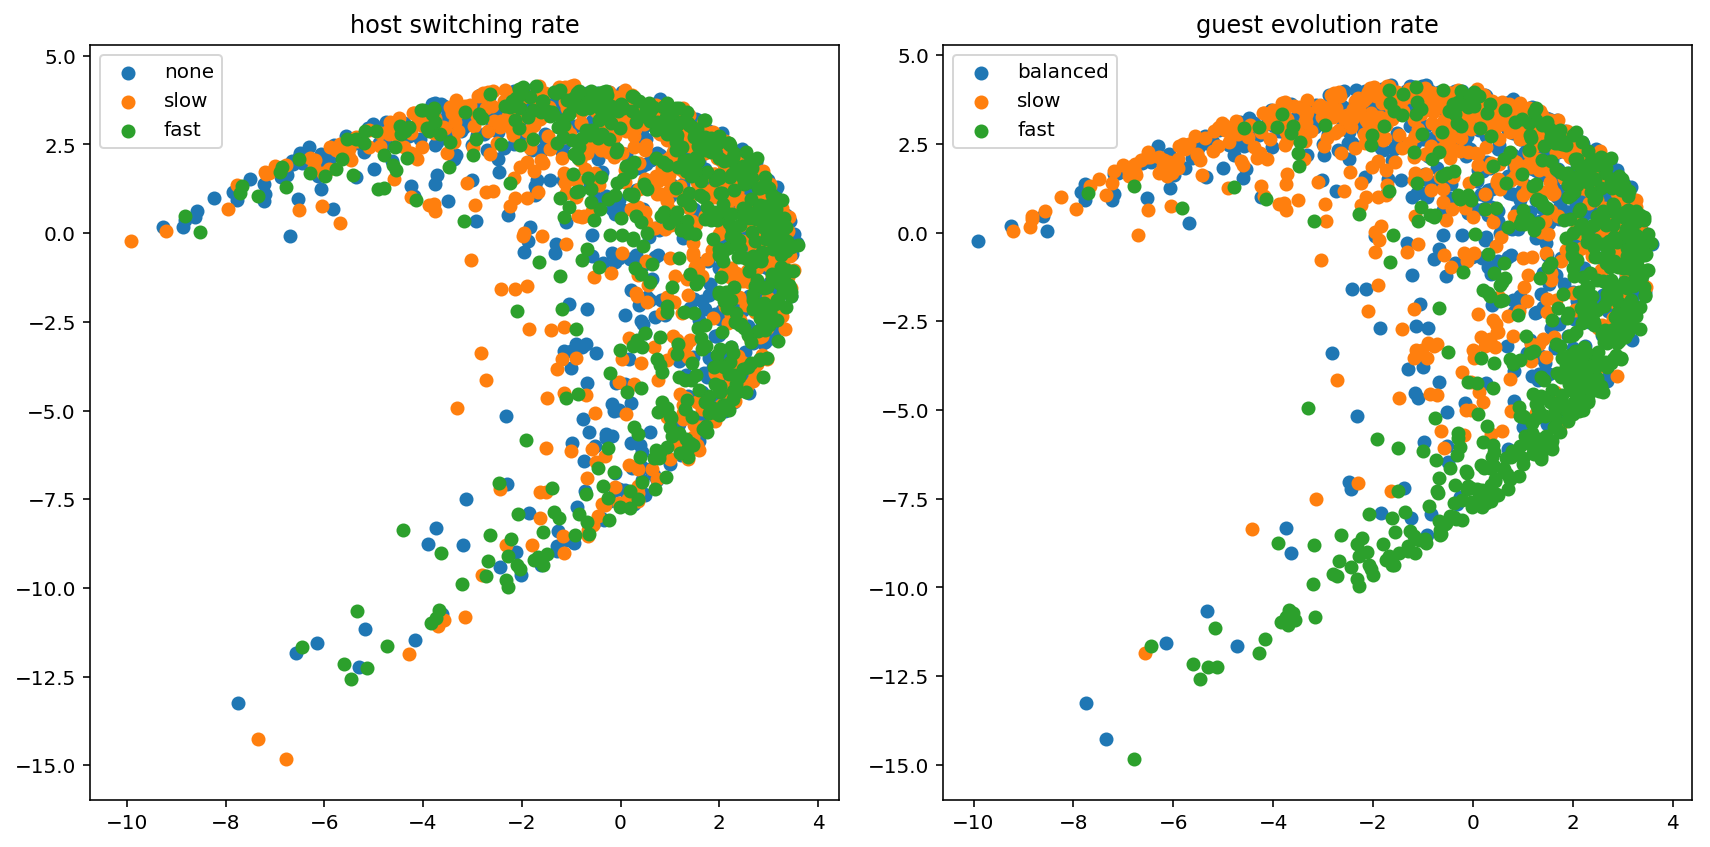

In [328]:
figure( figsize=(12,6) )

qq = q.dropna().join( gm_embedded )

xname,yname = gm_embedded.columns

subplot(1,2,1)
title( 'host switching rate' )
for l in set( qq.switch ) :
    scatter( qq[qq.switch==l][xname], qq[qq.switch==l][yname], label=l )
legend( loc=2 )

subplot(1,2,2)
title( 'guest evolution rate' )
for l in set( qq.g_evol ) :
    scatter( qq[qq.g_evol==l][xname], qq[qq.g_evol==l][yname], label=l )
legend( loc=2 )

tight_layout()

In [388]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = gm.dropna()
y = pandas.get_dummies( q.loc[X.index][['g_evol', 'switch']] )

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)

forest = RandomForestClassifier( n_estimators=1000,
                                 criterion='entropy',
                                 random_state=0,
                                 n_jobs=4 )

forest.fit( X_train, y_train )
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print( 'Feature ranking :' )
for f in range(X.shape[1]):
    print( '%d. feature %d : %f (%s)' % ( f + 1,
                                          indices[f],
                                          importances[indices[f]],
                                          X.columns[indices[f]] ) )

print( 'Score : %f' % ( forest.score( X_test, y_test ) ) )

Feature ranking :
1. feature 13 : 0.145576 (nestedness)
2. feature 11 : 0.109363 (std_betweenness)
3. feature 4 : 0.093190 (r)
4. feature 10 : 0.073776 (mean_betweenness)
5. feature 9 : 0.070074 (eccentricity)
6. feature 7 : 0.067948 (kurtosis)
7. feature 1 : 0.064681 (skew)
8. feature 0 : 0.063969 (eigengap)
9. feature 3 : 0.061070 (treedist)
10. feature 12 : 0.057534 (modularity)
11. feature 2 : 0.057176 (occupancy)
12. feature 6 : 0.056465 (squareness)
13. feature 5 : 0.055302 (p)
14. feature 8 : 0.023876 (diameter)
Score : 0.225000


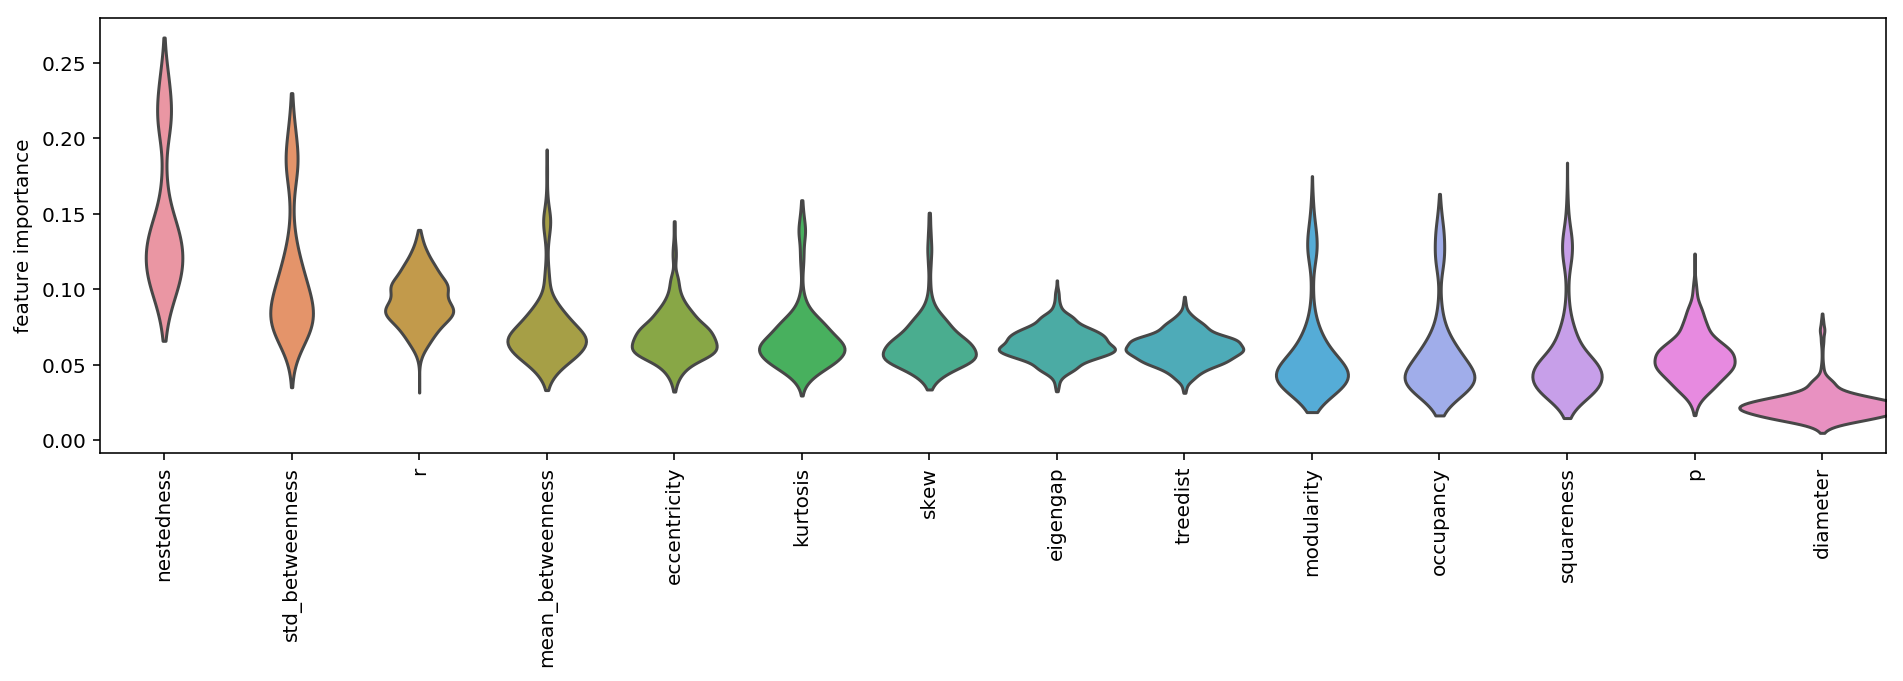

In [389]:
forest_imp = pandas.DataFrame( array( [tree.feature_importances_ for tree in forest.estimators_] ),
                               columns=X.columns)

figure( figsize=(16,4) )
seaborn.violinplot( x='variable',
                    y='value',
                    data=forest_imp.melt(),
                    order=X.columns[indices],
                    width=1.3, cut=0.001, inner=None )
xticks(range(X.shape[1]), rotation='vertical')
xlabel('')
ylabel('feature importance')

## Clustering with spectral distances

In [9]:
from pyprind import ProgBar

p = ProgBar( len(spectra)**2, title='calculating spectral distances...' )

s_d = zeros( ( len( spectra ), len( spectra ) ) )
for i in range( s_d.shape[0] ) :
    for j in range( s_d.shape[1] ) :
        p.update()
        s_d[i,j] = sqrt( 0.5 * ( entropy( spectra[i], spectra[j] ) + entropy( spectra[j], spectra[i] ) ) )

calculating spectral distances...
0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:02:28


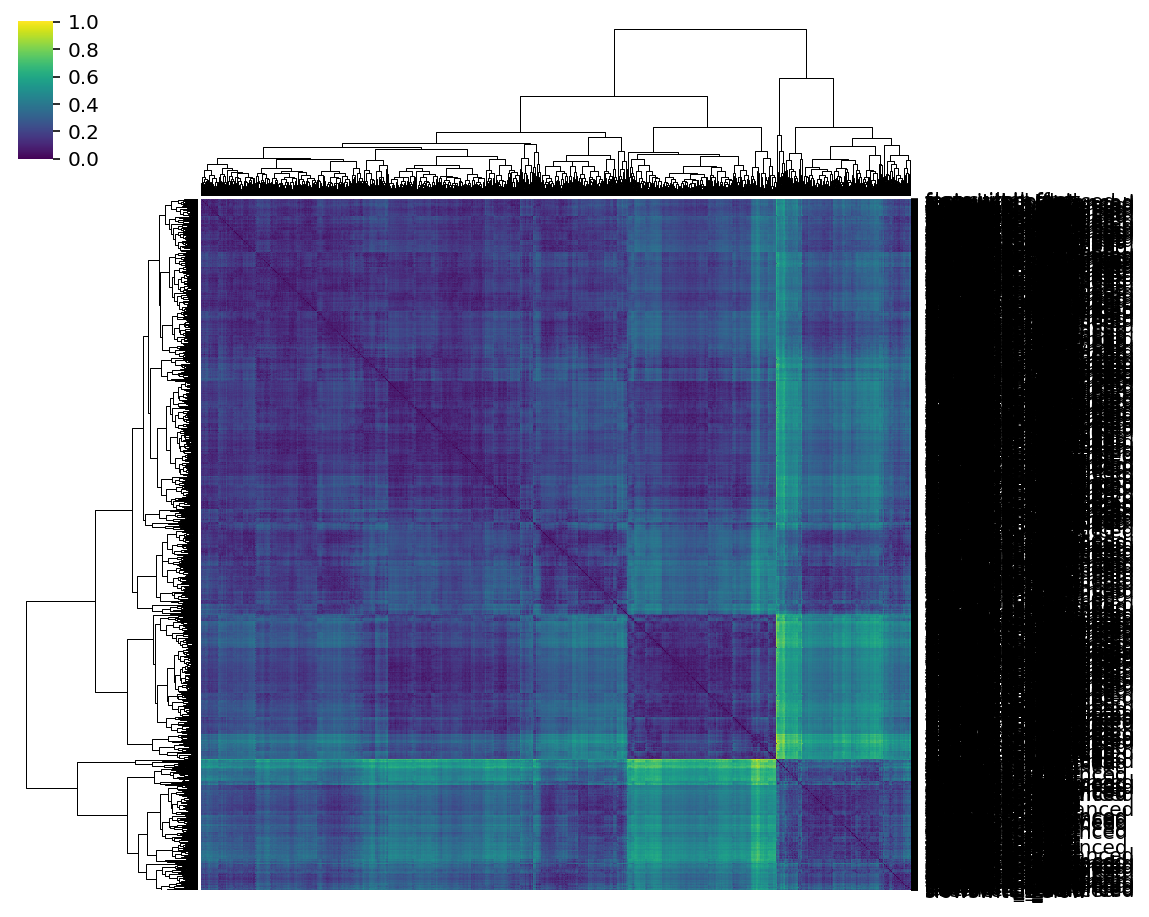

In [65]:
seaborn.clustermap( s_d, cmap='viridis', method='weighted', metric='euclidean', #metric='correlation',
                    figsize=(8,8), xticklabels=False, yticklabels=q.label )

In [26]:
from sklearn.manifold import TSNE, MDS, Isomap

sd_embedded = pandas.DataFrame( TSNE(n_components=2, perplexity=300).fit_transform( s_d ), 
                                columns=['tSNEx','tSNEy'] )
#sd_embedded = pandas.DataFrame( MDS(n_components=2, metric=True ).fit_transform( s_d ), 
#                                columns=['MDSx','MDSy'] )
#sd_embedded = pandas.DataFrame( Isomap(n_components=2 ).fit_transform( s_d ), 
#                                columns=['Isox','Isoy'] )

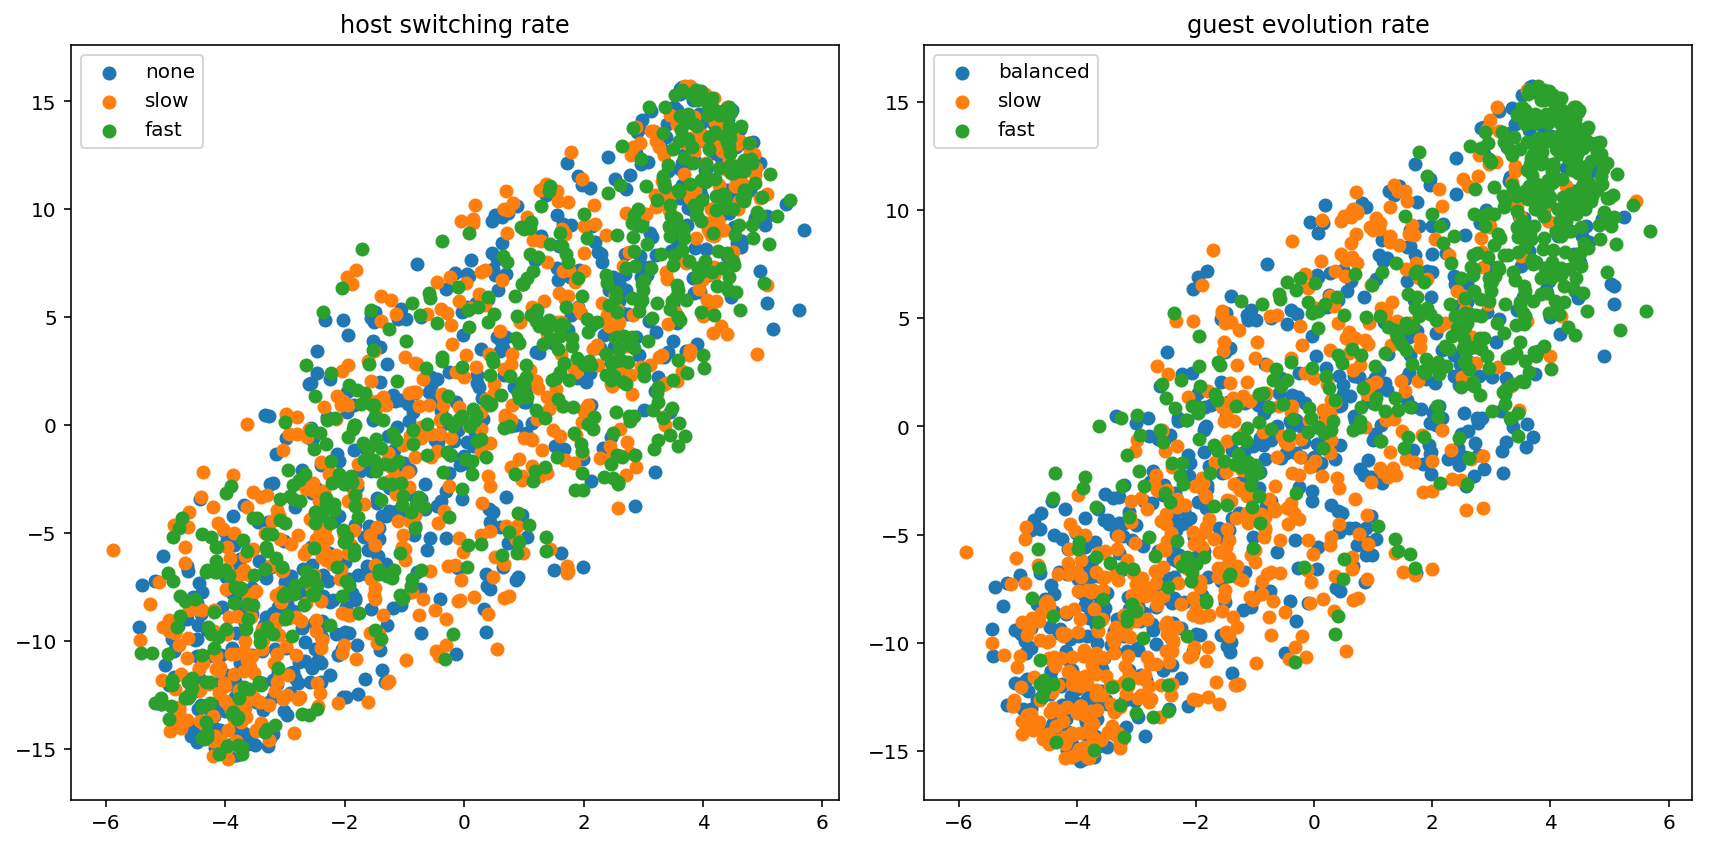

In [27]:
figure( figsize=(12,6) )

qq = q.join( sd_embedded )

subplot(1,2,1)
title( 'host switching rate' )
for l in set( qq.switch ) :
    scatter( qq[qq.switch==l]['tSNEx'], qq[qq.switch==l]['tSNEy'], label=l )
#legend( bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=3, mode="expand", borderaxespad=0. )
legend( loc=2 )

subplot(1,2,2)
title( 'guest evolution rate' )
for l in set( qq.g_evol ) :
    scatter( qq[qq.g_evol==l]['tSNEx'], qq[qq.g_evol==l]['tSNEy'], label=l )
#legend( bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=3, mode="expand", borderaxespad=0. )
legend( loc=2 )

tight_layout()

## Clustering with graph kernels

In [329]:
import graphkernels.kernels as gk

#g = gk.CalculateConnectedGraphletKernel( igraphs )
g = gk.CalculateGraphletKernel( igraphs )

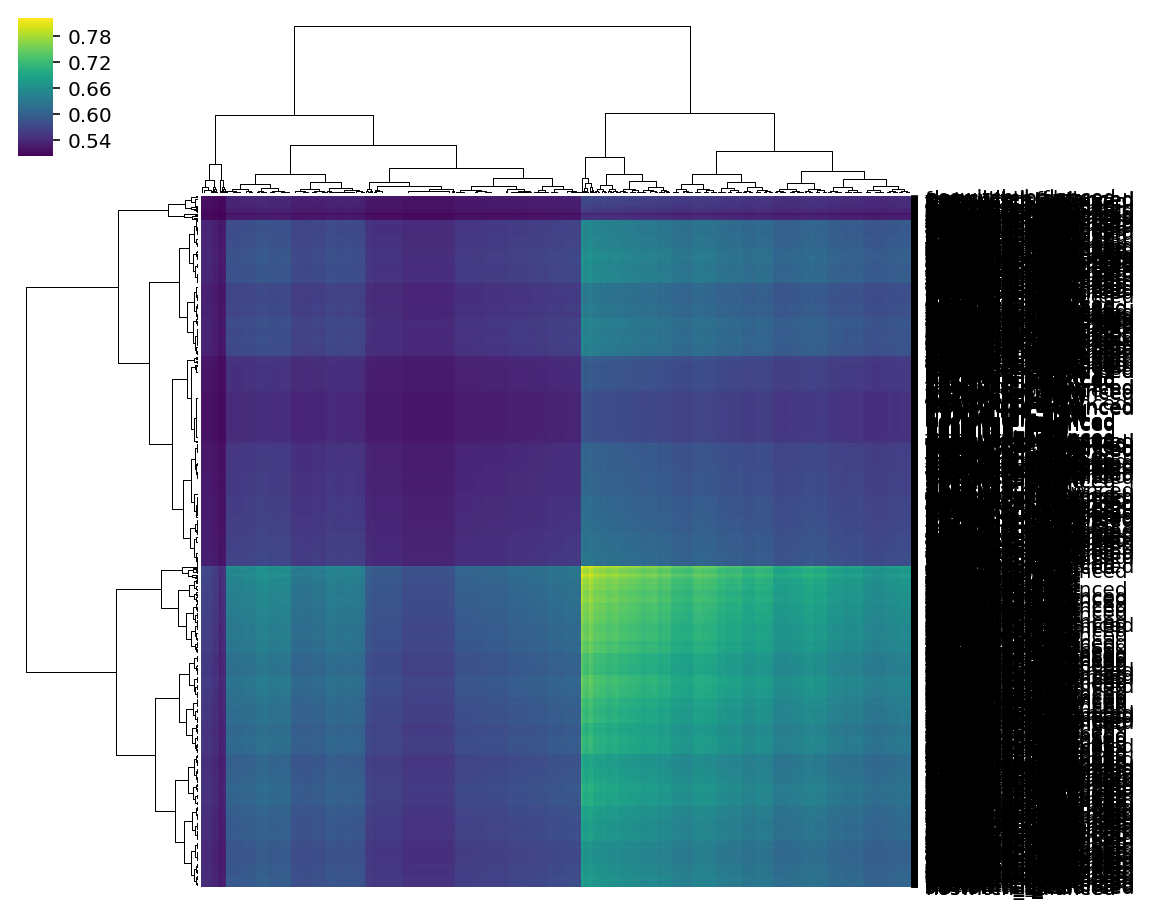

In [330]:
seaborn.clustermap( g, cmap='viridis', method='weighted', metric='euclidean',
                    figsize=(8,8), xticklabels=False, yticklabels=q.label )

Supposing that we treat graph kernels as products, owing to their basis in the direct product, we might
construct a distance measure from the graph kernel like so.

$g_k( A, B ) = AB$

$d( A, B ) = \sqrt{ A^2 + B^2 } = \sqrt{ \frac{A^2B^2}{B^2} + \frac{A^2B^2}{A^2} }$

$d_K( A, B ) = \sqrt{ \frac{g_k( A, B )^2}{ g_k( A, A ) } + \frac{g_k( A, B )^2}{ g_k( B, B ) } }$

In [87]:
d_k = zeros( g.shape )
for i in range( g.shape[0] ) :
    for j in range( g.shape[1] ) :
        d_k[i,j] = sqrt( g[j,j] - 2*g[j,i] + g[i,i] )

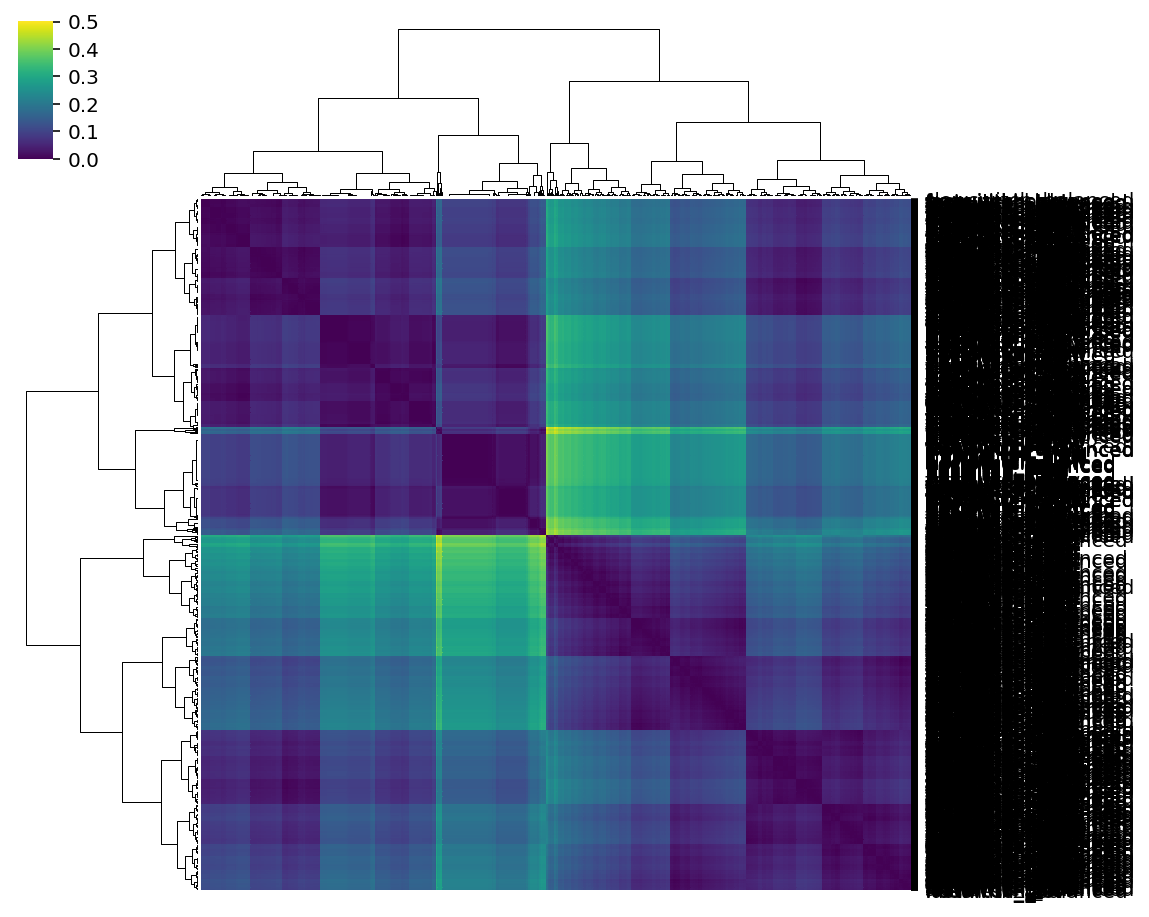

In [88]:
seaborn.clustermap( d_k, cmap='viridis', method='weighted', metric='euclidean',
                    figsize=(8,8), xticklabels=False, yticklabels=q.label )

In [97]:
from sklearn.manifold import TSNE

#dk_embedded = pandas.DataFrame( TSNE(n_components=2, perplexity=300).fit_transform( d_k ),
#                                columns=['tSNEx','tSNEy'] )

dk_embedded = pandas.DataFrame( MDS(n_components=2, metric=True ).fit_transform( s_d ), 
                                columns=['MDSx','MDSy'] )

#dk_embedded = pandas.DataFrame( Isomap(n_components=2 ).fit_transform( s_d ), 
#                                columns=['Isox','Isoy'] )

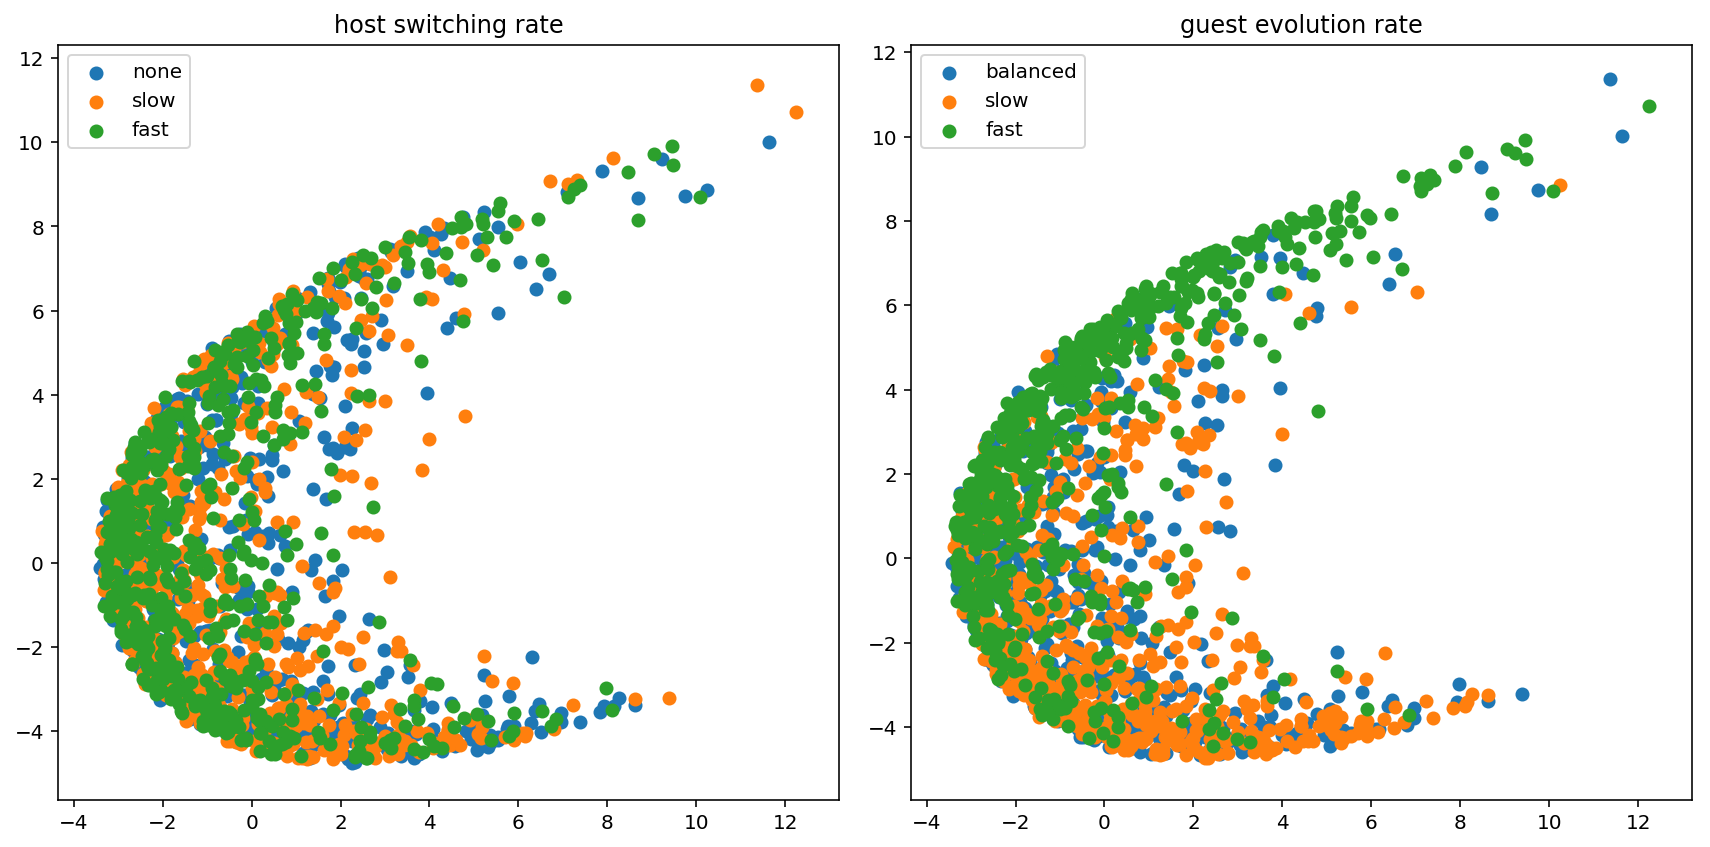

In [98]:
figure( figsize=(12,6) )

qq = q.join( dk_embedded )

xname,yname = dk_embedded.columns

subplot(1,2,1)
title( 'host switching rate' )
for l in set( qq.switch ) :
    scatter( qq[qq.switch==l][xname], qq[qq.switch==l][yname], label=l )
#legend( bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=3, mode="expand", borderaxespad=0. )
legend( loc=2 )

subplot(1,2,2)
title( 'guest evolution rate' )
for l in set( qq.g_evol ) :
    scatter( qq[qq.g_evol==l][xname], qq[qq.g_evol==l][yname], label=l )
#legend( bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=3, mode="expand", borderaxespad=0. )
legend( loc=2 )

tight_layout()

In [386]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#X = pandas.get_dummies( q[['g_evol', 'switch']] )
X = pandas.get_dummies( q[['label']] )
#y = pandas.DataFrame( g, index=q.index, columns=q.index )
y = g

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)


#forest = RandomForestClassifier( n_estimators=100,
#                                 criterion='entropy',
#                                 random_state=0,
#                                 n_jobs=4 )

forest = RandomForestRegressor( n_estimators=200,
                                #criterion='gini',
                                random_state=0,
                                n_jobs=4 )


forest.fit( X_train, y_train )
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print( 'Feature ranking :' )
for f in range(X.shape[1]):
    print( '%d. feature %d : %f (%s)' % ( f + 1,
                                          indices[f],
                                          importances[indices[f]],
                                          X.columns[indices[f]] ) )
    
print( 'Score : %f' % ( forest.score( X_test, y_test ) ) )

Feature ranking :
1. feature 1 : 0.279302 (label_fastswitch_fast)
2. feature 4 : 0.231911 (label_noswitch_fast)
3. feature 7 : 0.213780 (label_slowswitch_fast)
4. feature 0 : 0.139108 (label_fastswitch_balanced)
5. feature 2 : 0.041114 (label_fastswitch_slow)
6. feature 6 : 0.031647 (label_slowswitch_balanced)
7. feature 5 : 0.021780 (label_noswitch_slow)
8. feature 3 : 0.020993 (label_noswitch_balanced)
9. feature 8 : 0.020366 (label_slowswitch_slow)
Score : 0.413170


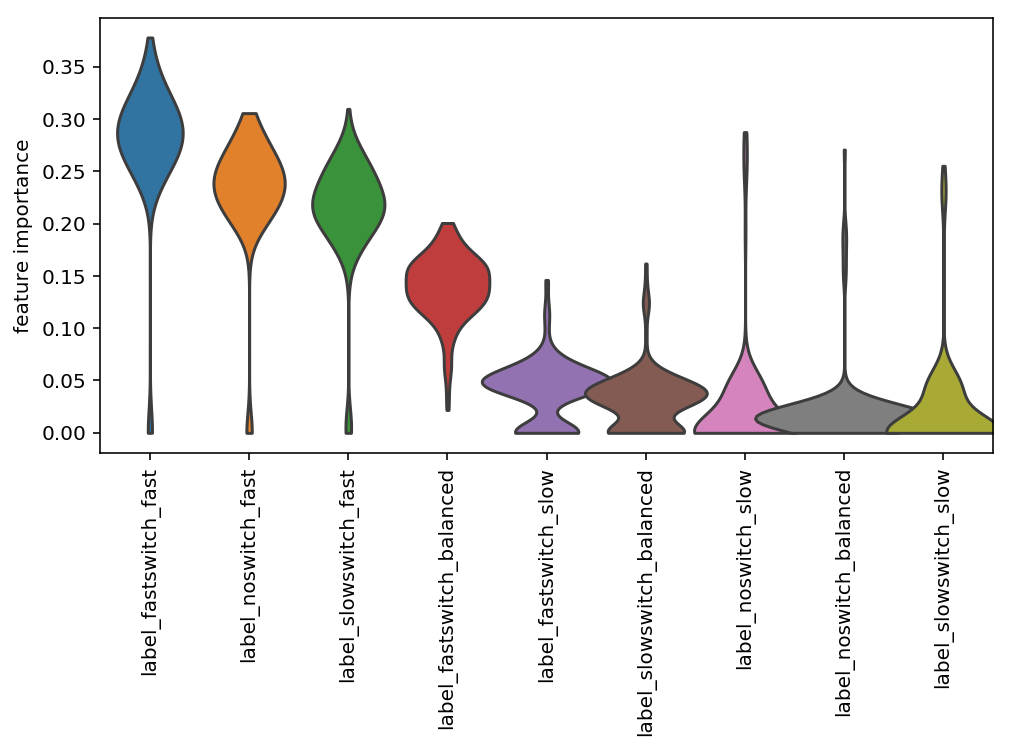

In [387]:
forest_imp = pandas.DataFrame( array( [tree.feature_importances_ for tree in forest.estimators_] ),
                               columns=X.columns)

figure( figsize=(8,4) )
seaborn.violinplot( x='variable',
                    y='value',
                    data=forest_imp.melt(),
                    order=X.columns[indices],
                    width=1.8, cut=0.001, inner=None )
xticks(range(X.shape[1]), rotation='vertical')
xlabel('')
ylabel('feature importance')

## Extended space of graph moments and graph kernels

In [419]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#y = pandas.DataFrame( g, index=q.index, columns=q.index )
y = gm.join( pandas.DataFrame( g ) ).dropna()

#X = pandas.get_dummies( q.loc[ y.index ][['g_evol', 'switch']] )
X = pandas.get_dummies( q.loc[ y.index ][['label']] )

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0 )


#forest = RandomForestClassifier( n_estimators=100,
#                                 criterion='entropy',
#                                 random_state=0,
#                                 n_jobs=4 )

forest = RandomForestRegressor( n_estimators=200,
                                #criterion='gini',
                                random_state=0,
                                n_jobs=4 )


forest.fit( X_train, y_train )
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print( 'Feature ranking :' )
for f in range(X.shape[1]):
    print( '%d. feature %d : %f (%s)' % ( f + 1,
                                          indices[f],
                                          importances[indices[f]],
                                          X.columns[indices[f]] ) )
    
print( 'Score : %f' % ( forest.score( X_test, y_test ) ) )

Feature ranking :
1. feature 4 : 0.321790 (label_noswitch_fast)
2. feature 7 : 0.319563 (label_slowswitch_fast)
3. feature 1 : 0.312138 (label_fastswitch_fast)
4. feature 0 : 0.031607 (label_fastswitch_balanced)
5. feature 8 : 0.004004 (label_slowswitch_slow)
6. feature 5 : 0.003709 (label_noswitch_slow)
7. feature 6 : 0.002851 (label_slowswitch_balanced)
8. feature 2 : 0.002607 (label_fastswitch_slow)
9. feature 3 : 0.001731 (label_noswitch_balanced)
Score : 0.445672


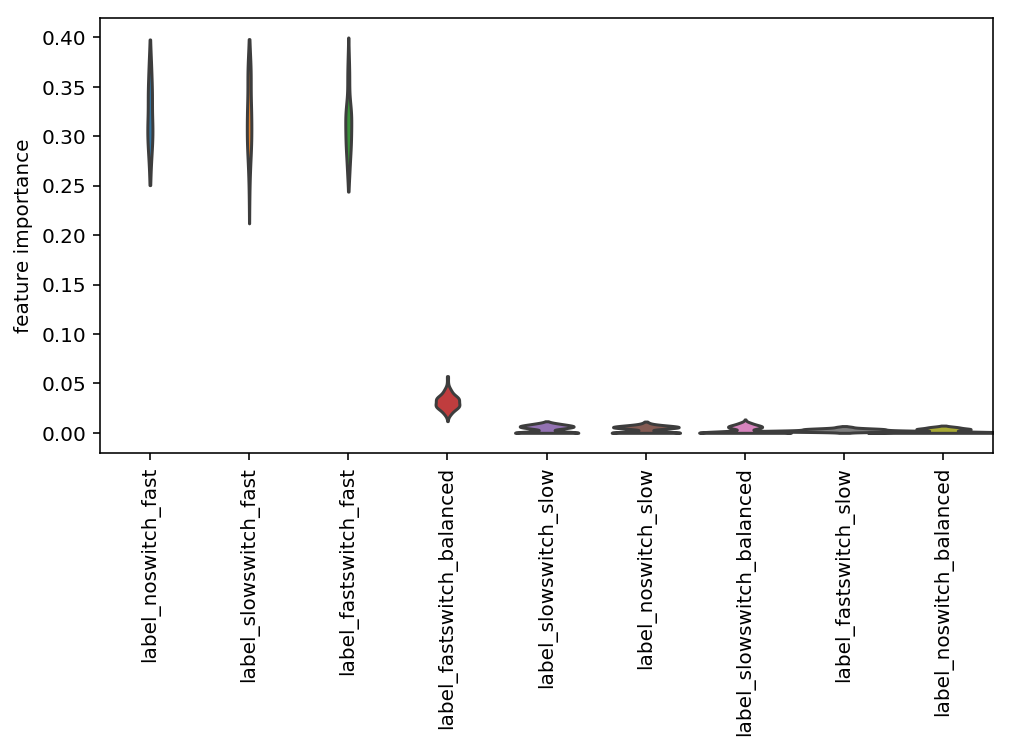

In [420]:
forest_imp = pandas.DataFrame( array( [tree.feature_importances_ for tree in forest.estimators_] ),
                               columns=X.columns)

figure( figsize=(8,4) )
seaborn.violinplot( x='variable',
                    y='value',
                    data=forest_imp.melt(),
                    order=X.columns[indices],
                    width=1.8, cut=0.001, inner=None )
xticks(range(X.shape[1]), rotation='vertical')
xlabel('')
ylabel('feature importance')